## Python and R

This setup allows you to use *Python* and *R* in the same notebook.

To set up a similar notebook, see quickstart instructions here:

https://github.com/dmil/jupyter-quickstart

Some thoughts on why I like this setup and how I use it at the [end](notebook.ipynb#Thoughts) of  this notebook.

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

This is a Python notebook, but below is an R cell. The `%%R` at the top of the cell indicates that the code in this cell will be R code.

In [2]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


## Read Data

In [4]:
election_results = pd.read_csv('election_results.csv')

election_results

,fips,state,county,year,type,class,democratic,republican,other,total,democratic_pct,republican_pct,other_pct
0,1001,Delaware,Autauga County,2024,presidential,NaN,7439,20484,358,28281,26.303879,72.430254,1.265868
1,1003,Delaware,Baldwin County,2024,presidential,NaN,24934,95798,1517,122249,20.396077,78.363013,1.240910
2,1005,Delaware,Barbour County,2024,presidential,NaN,4158,5606,91,9855,42.191781,56.884830,0.923389
3,1007,Delaware,Bibb County,2024,presidential,NaN,1619,7572,66,9257,17.489467,81.797559,0.712974
4,1009,Delaware,Blount County,2024,presidential,NaN,2576,25354,233,28163,9.146753,90.025921,0.827327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11447,56037,Wyoming,Sweetwater County,2024,senate,1.0,3550,12724,77,16351,21.711210,77.817870,0.470919
11448,56039,Wyoming,Teton County,2024,senate,1.0,7885,5083,91,13059,60.379815,38.923348,0.696837
11449,56041,Wyoming,Uinta County,2024,senate,1.0,1478,7310,53,8841,16.717566,82.682954,0.599480
11450,56043,Wyoming,Washakie County,2024,senate,1.0,588,3207,26,3821,15.388642,83.930908,0.680450


## Ask a question

You can do this part in Python or in R. 

If you want to try it in R, don't forget to put `%%R -i df` at the top of the cell to import the `df` variable from Python into R.

#### 🤔 In which counties did people vote for Donald Trump for president and a Democrat for Senate?

In [5]:
# make a new dataframe with only 2024 election results
df = election_results[election_results['year'] == 2024]

In [6]:
# keep only ['fips', 'state', 'county', 'total', 'democratic_pct', 'republican_pct', 'other'] columns
df = df[['fips', 'type', 'state', 'county', 'total', 'democratic_pct', 'republican_pct', 'other']]
df

,fips,type,state,county,total,democratic_pct,republican_pct,other
0,1001,presidential,Delaware,Autauga County,28281,26.303879,72.430254,358
1,1003,presidential,Delaware,Baldwin County,122249,20.396077,78.363013,1517
2,1005,presidential,Delaware,Barbour County,9855,42.191781,56.884830,91
3,1007,presidential,Delaware,Bibb County,9257,17.489467,81.797559,66
4,1009,presidential,Delaware,Blount County,28163,9.146753,90.025921,233
...,...,...,...,...,...,...,...,...
11447,56037,senate,Wyoming,Sweetwater County,16351,21.711210,77.817870,77
11448,56039,senate,Wyoming,Teton County,13059,60.379815,38.923348,91
11449,56041,senate,Wyoming,Uinta County,8841,16.717566,82.682954,53
11450,56043,senate,Wyoming,Washakie County,3821,15.388642,83.930908,26


In [7]:
# Pivot from longer to wider format (in this case each row is an election, we want each row to be a county
#  so we can compare presidential and senate results side-by-side)
df = df.pivot_table(index=['fips', 'state', 'county'], columns='type')
df

democratic_pct                   other  \
type                               presidential     senate presidential   
fips  state    county                                                     
1001  Delaware Autauga County         26.303879        NaN        358.0   
1003  Delaware Baldwin County         20.396077        NaN       1517.0   
1005  Delaware Barbour County         42.191781        NaN         91.0   
1007  Delaware Bibb County            17.489467        NaN         66.0   
1009  Delaware Blount County           9.146753        NaN        233.0   
...                                         ...        ...          ...   
56037 Wyoming  Sweetwater County      22.343993  21.711210        426.0   
56039 Wyoming  Teton County           65.843745  60.379815        404.0   
56041 Wyoming  Uinta County           17.174607  16.717566        246.0   
56043 Wyoming  Washakie County        16.920299  15.388642         96.0   
56045 Wyoming  Weston County          10.763098  10.977752         65.0   

                                        republican_pct             \
type                             senate   presidential     senate   
fips  state    county                                               
1001  Delaware Autauga County       NaN      72.430254        NaN   
1003  Delaware Baldwin County       NaN      78.363013        NaN   
1005  Delaware Barbour County       NaN      56.884830        NaN   
1007  Delaware Bibb County          NaN      81.797559        NaN   
1009  Delaware Blount County        NaN      90.025921        NaN   
...                                 ...            ...        ...   
56037 Wyoming  Sweetwater County   77.0      75.104803  77.817870   
56039 Wyoming  Teton County        91.0      31.115460  38.923348   
56041 Wyoming  Uinta County        53.0      80.118825  82.682954   
56043 Wyoming  Washakie County     26.0      80.603559  83.930908   
56045 Wyoming  Weston County       15.0      87.386105  88.583138   

                                        total           
type                             presidential   senate  
fips  state    county                                   
1001  Delaware Autauga County         28281.0      NaN  
1003  Delaware Baldwin County        122249.0      NaN  
1005  Delaware Barbour County          9855.0      NaN  
1007  Delaware Bibb County             9257.0      NaN  
1009  Delaware Blount County          28163.0      NaN  
...                                       ...      ...  
56037 Wyoming  Sweetwater County      16698.0  16351.0  
56039 Wyoming  Teton County           13286.0  13059.0  
56041 Wyoming  Uinta County            9089.0   8841.0  
56043 Wyoming  Washakie County         3877.0   3821.0  
56045 Wyoming  Weston County           3512.0   3416.0  

[3057 rows x 8 columns]

In [8]:
# remove the pesky multi-index (convert the levels to strings and combine them with an underscore)
df.columns = df.columns.map('_'.join)

df = df.reset_index()
df

,fips,state,county,democratic_pct_presidential,democratic_pct_senate,other_presidential,other_senate,republican_pct_presidential,republican_pct_senate,total_presidential,total_senate
0,1001,Delaware,Autauga County,26.303879,NaN,358.0,NaN,72.430254,NaN,28281.0,NaN
1,1003,Delaware,Baldwin County,20.396077,NaN,1517.0,NaN,78.363013,NaN,122249.0,NaN
2,1005,Delaware,Barbour County,42.191781,NaN,91.0,NaN,56.884830,NaN,9855.0,NaN
3,1007,Delaware,Bibb County,17.489467,NaN,66.0,NaN,81.797559,NaN,9257.0,NaN
4,1009,Delaware,Blount County,9.146753,NaN,233.0,NaN,90.025921,NaN,28163.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3052,56037,Wyoming,Sweetwater County,22.343993,21.711210,426.0,77.0,75.104803,77.817870,16698.0,16351.0
3053,56039,Wyoming,Teton County,65.843745,60.379815,404.0,91.0,31.115460,38.923348,13286.0,13059.0
3054,56041,Wyoming,Uinta County,17.174607,16.717566,246.0,53.0,80.118825,82.682954,9089.0,8841.0
3055,56043,Wyoming,Washakie County,16.920299,15.388642,96.0,26.0,80.603559,83.930908,3877.0,3821.0


In [9]:
# remove rows that don't have senate elections in 2024
df = df[df['total_senate'].notna()]
df

,fips,state,county,democratic_pct_presidential,democratic_pct_senate,other_presidential,other_senate,republican_pct_presidential,republican_pct_senate,total_presidential,total_senate
91,4001,Oklahoma,Apache County,58.789446,62.315256,434.0,752.0,39.858571,35.330035,32101.0,31936.0
92,4003,Oklahoma,Cochise County,37.703560,40.097896,903.0,1694.0,60.769426,56.992701,59135.0,58225.0
93,4005,Oklahoma,Coconino County,58.976326,61.705217,1294.0,1814.0,39.184926,35.687075,70374.0,69563.0
94,4007,Oklahoma,Gila County,30.702578,34.085927,293.0,609.0,68.239584,63.689171,27698.0,27372.0
95,4009,Oklahoma,Graham County,25.415708,28.220164,171.0,387.0,73.460401,69.201040,15215.0,15007.0
...,...,...,...,...,...,...,...,...,...,...,...
3052,56037,Wyoming,Sweetwater County,22.343993,21.711210,426.0,77.0,75.104803,77.817870,16698.0,16351.0
3053,56039,Wyoming,Teton County,65.843745,60.379815,404.0,91.0,31.115460,38.923348,13286.0,13059.0
3054,56041,Wyoming,Uinta County,17.174607,16.717566,246.0,53.0,80.118825,82.682954,9089.0,8841.0
3055,56043,Wyoming,Washakie County,16.920299,15.388642,96.0,26.0,80.603559,83.930908,3877.0,3821.0


In [10]:
# calculate republican to democratic margin
df['diff_rep_margin_presidential'] = df['republican_pct_presidential'] - df['democratic_pct_presidential']
df['diff_rep_margin_senate'] = df['republican_pct_senate'] - df['democratic_pct_senate']
df

,fips,state,county,democratic_pct_presidential,democratic_pct_senate,other_presidential,other_senate,republican_pct_presidential,republican_pct_senate,total_presidential,total_senate,diff_rep_margin_presidential,diff_rep_margin_senate
91,4001,Oklahoma,Apache County,58.789446,62.315256,434.0,752.0,39.858571,35.330035,32101.0,31936.0,-18.930874,-26.985220
92,4003,Oklahoma,Cochise County,37.703560,40.097896,903.0,1694.0,60.769426,56.992701,59135.0,58225.0,23.065866,16.894805
93,4005,Oklahoma,Coconino County,58.976326,61.705217,1294.0,1814.0,39.184926,35.687075,70374.0,69563.0,-19.791400,-26.018142
94,4007,Oklahoma,Gila County,30.702578,34.085927,293.0,609.0,68.239584,63.689171,27698.0,27372.0,37.537006,29.603244
95,4009,Oklahoma,Graham County,25.415708,28.220164,171.0,387.0,73.460401,69.201040,15215.0,15007.0,48.044693,40.980876
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052,56037,Wyoming,Sweetwater County,22.343993,21.711210,426.0,77.0,75.104803,77.817870,16698.0,16351.0,52.760810,56.106660
3053,56039,Wyoming,Teton County,65.843745,60.379815,404.0,91.0,31.115460,38.923348,13286.0,13059.0,-34.728285,-21.456467
3054,56041,Wyoming,Uinta County,17.174607,16.717566,246.0,53.0,80.118825,82.682954,9089.0,8841.0,62.944218,65.965389
3055,56043,Wyoming,Washakie County,16.920299,15.388642,96.0,26.0,80.603559,83.930908,3877.0,3821.0,63.683260,68.542266


In [11]:
# exclude nebrasksa for now because it has two senate races
df = df[df['state'] != 'Nebraska']
df

,fips,state,county,democratic_pct_presidential,democratic_pct_senate,other_presidential,other_senate,republican_pct_presidential,republican_pct_senate,total_presidential,total_senate,diff_rep_margin_presidential,diff_rep_margin_senate
91,4001,Oklahoma,Apache County,58.789446,62.315256,434.0,752.0,39.858571,35.330035,32101.0,31936.0,-18.930874,-26.985220
92,4003,Oklahoma,Cochise County,37.703560,40.097896,903.0,1694.0,60.769426,56.992701,59135.0,58225.0,23.065866,16.894805
93,4005,Oklahoma,Coconino County,58.976326,61.705217,1294.0,1814.0,39.184926,35.687075,70374.0,69563.0,-19.791400,-26.018142
94,4007,Oklahoma,Gila County,30.702578,34.085927,293.0,609.0,68.239584,63.689171,27698.0,27372.0,37.537006,29.603244
95,4009,Oklahoma,Graham County,25.415708,28.220164,171.0,387.0,73.460401,69.201040,15215.0,15007.0,48.044693,40.980876
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052,56037,Wyoming,Sweetwater County,22.343993,21.711210,426.0,77.0,75.104803,77.817870,16698.0,16351.0,52.760810,56.106660
3053,56039,Wyoming,Teton County,65.843745,60.379815,404.0,91.0,31.115460,38.923348,13286.0,13059.0,-34.728285,-21.456467
3054,56041,Wyoming,Uinta County,17.174607,16.717566,246.0,53.0,80.118825,82.682954,9089.0,8841.0,62.944218,65.965389
3055,56043,Wyoming,Washakie County,16.920299,15.388642,96.0,26.0,80.603559,83.930908,3877.0,3821.0,63.683260,68.542266


In [12]:
# calculate the difference between presidential and senate margins
df['diff'] = df['republican_pct_presidential'] - df['republican_pct_senate']
df.sort_values(by='diff', ascending=False)

,fips,state,county,democratic_pct_presidential,democratic_pct_senate,other_presidential,other_senate,republican_pct_presidential,republican_pct_senate,total_presidential,total_senate,diff_rep_margin_presidential,diff_rep_margin_senate,diff
1091,23003,Maine,Aroostook County,36.182088,47.743685,507.0,3312.0,62.395871,42.802911,35653.0,35035.0,26.213783,-4.940774,19.592960
1102,23025,Maine,Somerset County,35.631659,43.594034,481.0,2793.0,62.677121,46.245908,28441.0,27490.0,27.045463,2.651873,16.431213
1098,23017,Maine,Oxford County,42.685747,49.288642,597.0,3544.0,55.588320,40.336651,34590.0,34160.0,12.902573,-8.951991,15.251669
1093,23007,Maine,Franklin County,44.797040,51.400227,387.0,1842.0,53.033191,38.157596,17836.0,17640.0,8.236152,-13.242630,14.875595
1100,23021,Maine,Piscataquis County,34.394904,42.468329,208.0,870.0,63.566879,48.921219,10205.0,10104.0,29.171975,6.452890,14.645660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,24041,Maryland,Talbot County,48.703460,38.535493,586.0,608.0,48.729742,58.795382,22830.0,22779.0,0.026281,20.259888,-10.065640
1116,24021,Maryland,Frederick County,52.787706,42.825114,4952.0,4722.0,44.040253,54.123888,156114.0,154769.0,-8.747454,11.298774,-10.083635
1121,24031,Maryland,Montgomery County,74.454038,65.837666,20003.0,7264.0,21.693460,32.756889,519221.0,516847.0,-52.760578,-33.080776,-11.063429
1108,24003,Maryland,Anne Arundel County,55.186281,44.346252,10735.0,8044.0,41.368287,53.062145,311572.0,310387.0,-13.817994,8.715893,-11.693858


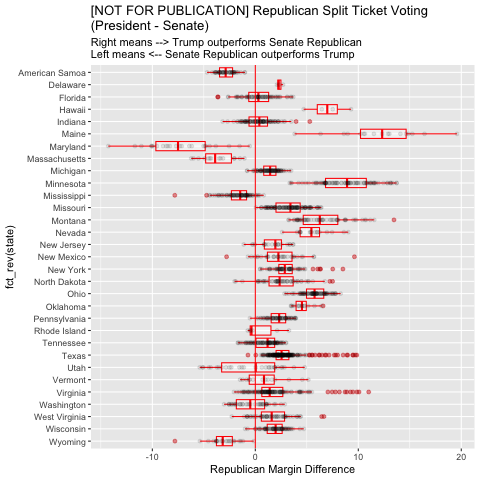

In [13]:
%%R -i df

ggplot(df) + 
    aes(x=diff, y=fct_rev(state)) + 
    geom_boxplot(alpha=.4, color='red') + 

    geom_point(alpha=.1) +
    geom_vline(aes(xintercept=0), color='red') + 
    labs(
        title='[NOT FOR PUBLICATION] Republican Split Ticket Voting\n(President - Senate)',
        subtitle='Right means --> Trump outperforms Senate Republican\nLeft means <-- Senate Republican outperforms Trump',
        x='Republican Margin Difference') 

In [19]:

split = df[
    (df['diff_rep_margin_presidential'] > 0) & 
    (df['diff_rep_margin_senate'] < 0)
]

In [20]:
split

,fips,state,county,democratic_pct_presidential,democratic_pct_senate,other_presidential,other_senate,republican_pct_presidential,republican_pct_senate,total_presidential,total_senate,diff_rep_margin_presidential,diff_rep_margin_senate,diff
98,4013,Oklahoma,Maricopa County,47.537270,51.407787,30027.0,48025.0,51.006221,46.231399,2061574.0,2034256.0,3.468951,-5.176389,4.774823
1090,23001,Maine,Androscoggin County,45.913980,50.386505,1223.0,6809.0,52.007749,37.916996,58847.0,58214.0,6.093769,-12.469509,14.090753
1091,23003,Maine,Aroostook County,36.182088,47.743685,507.0,3312.0,62.395871,42.802911,35653.0,35035.0,26.213783,-4.940774,19.592960
1093,23007,Maine,Franklin County,44.797040,51.400227,387.0,1842.0,53.033191,38.157596,17836.0,17640.0,8.236152,-13.242630,14.875595
1095,23011,Maine,Kennebec County,47.450814,50.743855,1712.0,8157.0,50.200313,37.882907,72886.0,71721.0,2.749499,-12.860947,12.317405
1098,23017,Maine,Oxford County,42.685747,49.288642,597.0,3544.0,55.588320,40.336651,34590.0,34160.0,12.902573,-8.951991,15.251669
1099,23019,Maine,Penobscot County,43.578377,45.490803,1690.0,11105.0,54.480723,41.596707,87073.0,86002.0,10.902346,-3.894095,12.884016
1217,26145,Michigan,Saginaw County,47.610577,48.724690,1573.0,2609.0,50.876923,48.715861,104000.0,101936.0,3.266346,-0.008829,2.161062
1229,27003,Minnesota,Anoka County,46.401813,51.851187,5840.0,7860.0,50.823590,44.335334,210481.0,206111.0,4.421777,-7.515853,6.488256
1231,27007,Minnesota,Beltrami County,46.204873,50.429403,483.0,901.0,51.853341,45.903374,24874.0,24569.0,5.648468,-4.526029,5.949967


### Remember, our original question was:
### 🤔 In which counties did people vote for Donald Trump for president and a Democrat for Senate?

#### 👉 Google three of these races to kearn nore about why people miht have been inclined to vote for Trump 
#### for president but not a Republican for the Senate seat.
#### filter `df` to look up particular counties if you would like
#### Write your explanations below.

### 1.  interestingly enough, it seems like its pretty limited to a few states that have multiple counties for the most part (TX, PA, NY, NJ, Montana, Minnesota, for example) In most of these states, they had a wild shift toward Trump this election despite some states even usually leaning democrat, (NJ, NY for example). 

### 2. Alot of people in these areas were polled, and seemed unhappy with President Biden's work, meaning they were unhappy with Harris, despite her trying to separate herself. 

### 3. I feel states like Texas, for example, do have a large democratic community despite being a huge
### Republican state. It could be that some just voted for president only as many do not pay attention to other races beside the presidential one. 

# One More Thing
Here's an example of a map, in case you need one for your analysis. It seems like in Texas for example, there are a lot of outliers to the right. Meaning there seem to be many counties where Trump does better than the Senate Republican. Let's see what those places are.

  |======================================================================| 100%


Linking to GEOS 3.13.0, GDAL 3.10.1, PROJ 9.5.1; sf_use_s2() is TRUE
To enable caching of data, set `options(tigris_use_cache = TRUE)`
in your R script or .Rprofile.
Retrieving data for the year 2022
Using FIPS code '48' for state 'TX'


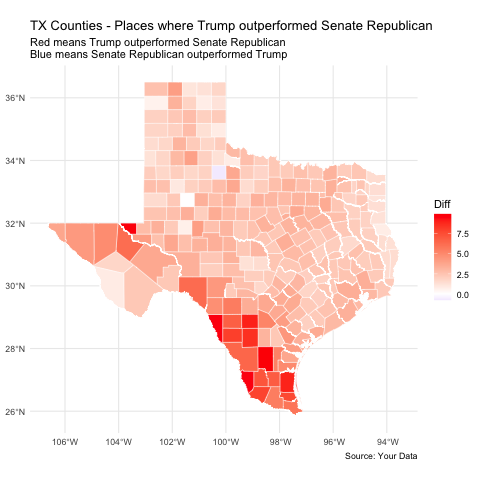

In [13]:
%%R -i df

library(sf) # for map geoms
library(tigris)  # For county shapefiles

# Load county shapefile for Texas
selected_state <- "TX"
state_map <- counties(state = selected_state, cb = TRUE, class = "sf")

# Ensure FIPS codes are in the same format
df$fips <- as.character(df$fips)
state_map$GEOID <- as.character(state_map$GEOID)

# Merge Texas map with your data
state_map <- state_map %>%
  left_join(df, by = c("GEOID" = "fips"))

# Plot the map
ggplot(state_map) +
  geom_sf(aes(fill = diff), color = "white") +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0) +
  theme_minimal() +
  labs(
    title = paste(selected_state, "Counties - Places where Trump outperformed Senate Republican"),
    subtitle = "Red means Trump outperformed Senate Republican\nBlue means Senate Republican outperformed Trump",
    fill = "Diff",
    caption = "Source: Your Data"
  )
